# if you take the code from my repository please leave a link to the source

In [40]:
import numpy as np
import rasterio as rastr
import matplotlib.pyplot as plt
from osgeo import gdal
from osgeo import ogr
from osgeo import osr
from osgeo import gdal_array
from osgeo import gdalconst

In [37]:
import rasterio

with rasterio.open("../images/output_raster.tif") as src:
    
    print('Size raster file:', src.width, 'x', src.height)
    print('Quantity layer:', src.count)

Size raster file: 777 x 505
Quantity layer: 1


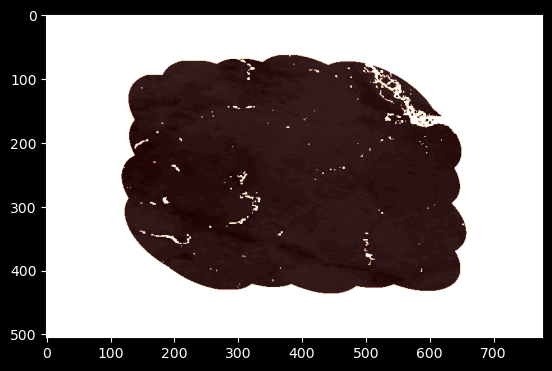

In [46]:
import rasterio
import matplotlib.pyplot as plt

with rasterio.open("../images/output_raster.tif") as src:
    
    data = src.read(1)
    
    plt.imshow(data, cmap='pink')
    plt.show()


In [39]:
import rasterio

with rasterio.open("../images/output_raster.tif") as src:

    print('Metadata:')
    print(src.profile)


Metadata:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 777, 'height': 505, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.002083333, 0.0, 29.566633136000007,
       0.0, -0.002083333, 50.486672568), 'blockysize': 5, 'tiled': False, 'interleave': 'band'}


half of the code is not used

In [44]:
from osgeo import gdal
from osgeo import osr
import numpy as np

# Open the image file
ds = gdal.Open("../images/")

# Get the dimensions of the image
rows = ds.RasterYSize
cols = ds.RasterXSize

# Create an arbitrary polygon that fits the extent of the image
ring = ogr.Geometry(ogr.wkbLinearRing)
ring.AddPoint(0, 0)
ring.AddPoint(0, rows)
ring.AddPoint(cols, rows)
ring.AddPoint(cols, 0)
ring.AddPoint(0, 0)
poly = ogr.Geometry(ogr.wkbPolygon)
poly.AddGeometry(ring)

# Save the polygon in GeoJSON format
driver = ogr.GetDriverByName('GeoJSON')
out_file = '../polygon.geojson'
out_ds = driver.CreateDataSource(out_file)
out_lyr = out_ds.CreateLayer('polygon', geom_type=ogr.wkbPolygon)
feature_defn = out_lyr.GetLayerDefn()
feature = ogr.Feature(feature_defn)
feature.SetGeometry(poly)
out_lyr.CreateFeature(feature)
feature = None
out_ds = None

# Crop the image to the dimensions of the polygon
gdal.Warp('../cropped_image.tif', ds, cutlineDSName=out_file)

# Resave the image in JPEG format
gdal.Translate('../resaved_image.png', '../cropped_image.tif', format='PNG')

# Convert the coordinates of two arbitrary image pixels to EPSG:3857
geotransform = ds.GetGeoTransform()
x1, y1 = geotransform[0] + 100 * geotransform[1], geotransform[3] + 100 * geotransform[5]
x2, y2 = geotransform[0] + 200 * geotransform[1], geotransform[3] + 200 * geotransform[5]
src_srs = osr.SpatialReference()
src_srs.ImportFromWkt(ds.GetProjection())
dst_srs = osr.SpatialReference()
dst_srs.ImportFromEPSG(3857)
transform = osr.CoordinateTransformation(src_srs, dst_srs)
x1, y1, _ = transform.TransformPoint(x1, y1)
x2, y2, _ = transform.TransformPoint(x2, y2)
print(f"Pixel (100, 100) in EPSG:3857: ({x1}, {y1})")
print(f"Pixel (200, 200) in EPSG:3857: ({x2}, {y2})")

# Close the file
ds = None

Pixel (100, 100) in EPSG:3857: (5596959.125245212, 3474656.5495024156)
Pixel (200, 200) in EPSG:3857: (5573767.56837393, 3501403.360853997)


In [45]:
from osgeo import gdal
from osgeo import osr
import numpy as np

raster_ds = gdal.Open("../images/soil_moisture.tif")

cutline_ds = ogr.Open("../polygon1337.geojson")
cutline_layer = cutline_ds.GetLayer()

gdal.Warp("../images/soil_moisture.tif", raster_ds, cutlineDSName="../polygon1337.geojson")

raster_ds = None
cutline_ds = None


#Show result 

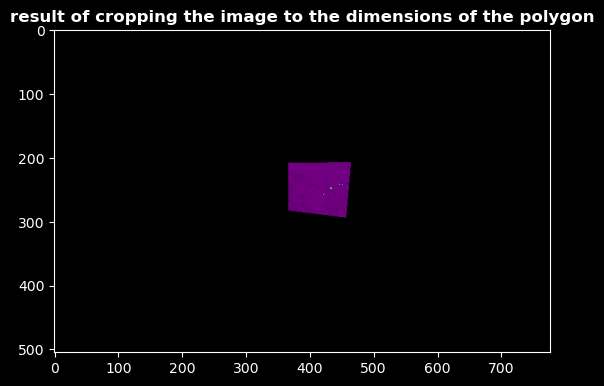

In [67]:
import rasterio
import matplotlib.pyplot as plt

with rasterio.open("../images/soil_moisture.tif") as src:
    
    data = src.read(1)

    plt.title('result of cropping the image to the dimensions of the polygon', 
                                     fontweight ="bold")
    plt.imshow(data, cmap='nipy_spectral')
    plt.show()

Copyright © by BogdanJeN 2023. All rights reserved.